In [1]:
##https://www.r-bloggers.com/2021/05/linear-discriminant-analysis-in-r/

In [9]:
library(klaR)
library(psych)
library(MASS)
library(ggord)
library(devtools)

Loading required package: usethis



In [10]:
#install.packages("klaR")
#install.packages("psych")
#install.packages("ggord")
# Enable the r-universe repo
#options(repos = c(
  #  fawda123 = 'https://fawda123.r-universe.dev',
 #   CRAN = 'https://cloud.r-project.org'))

# Install ggord
#install.packages('ggord')

In [11]:
data("iris")
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


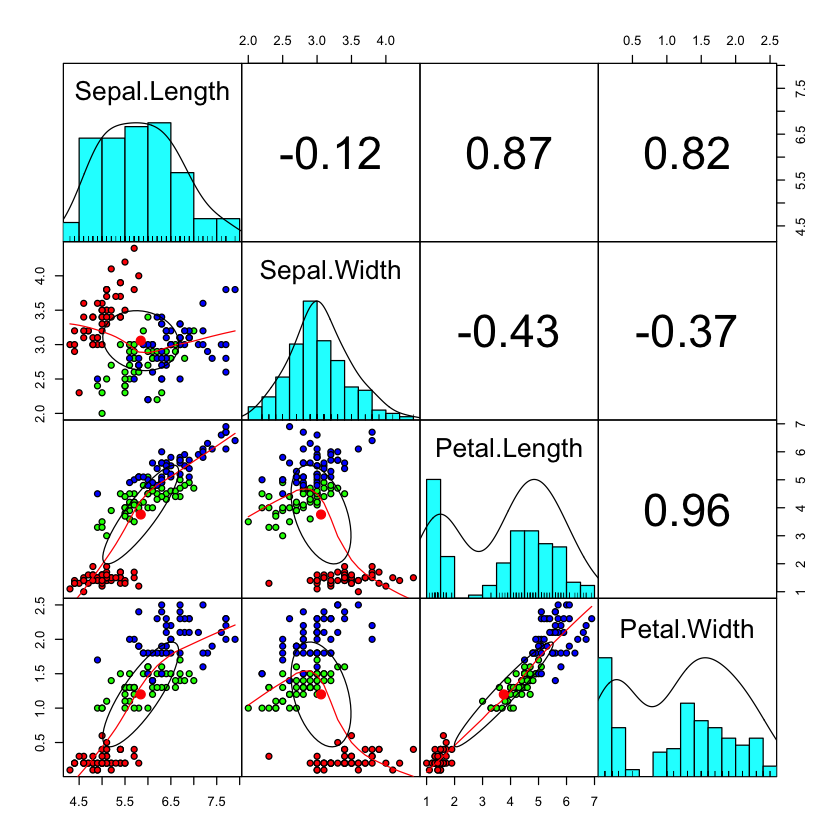

In [12]:
pairs.panels(iris[1:4],
             gap = 0,
             bg = c("red", "green", "blue")[iris$Species],
             pch = 21)

In [13]:
set.seed(123)
ind <- sample(2, nrow(iris),
              replace = TRUE,
              prob = c(0.6, 0.4))
training <- iris[ind==1,]
testing <- iris[ind==2,]

In [14]:
linear <- lda(Species~., training)
linear

Call:
lda(Species ~ ., data = training)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3370787  0.3370787  0.3258427 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         4.946667    3.380000     1.443333    0.250000
versicolor     5.943333    2.803333     4.240000    1.316667
virginica      6.527586    2.920690     5.489655    2.048276

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.3629008  0.05215114
Sepal.Width   2.2276982  1.47580354
Petal.Length -1.7854533 -1.60918547
Petal.Width  -3.9745504  4.10534268

Proportion of trace:
   LD1    LD2 
0.9932 0.0068 

In [15]:
attributes(linear)


$names
 [1] "prior"   "counts"  "means"   "scaling" "lev"     "svd"     "N"      
 [8] "call"    "terms"   "xlevels"

$class
[1] "lda"

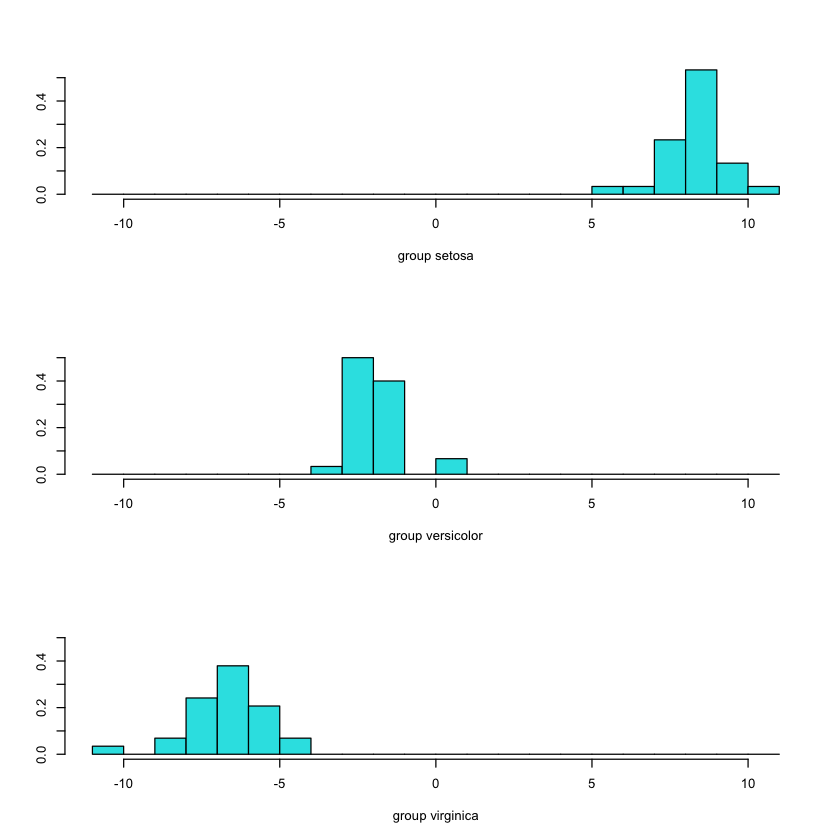

In [16]:
p <- predict(linear, training)
ldahist(data = p$x[,1], g = training$Species)

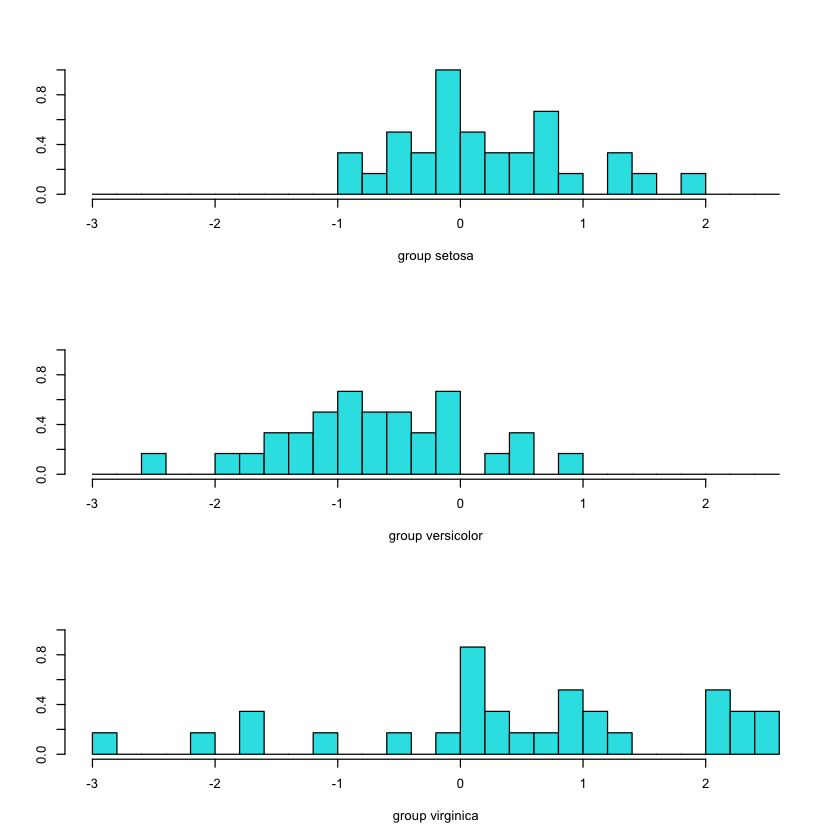

In [17]:
ldahist(data = p$x[,2], g = training$Species)

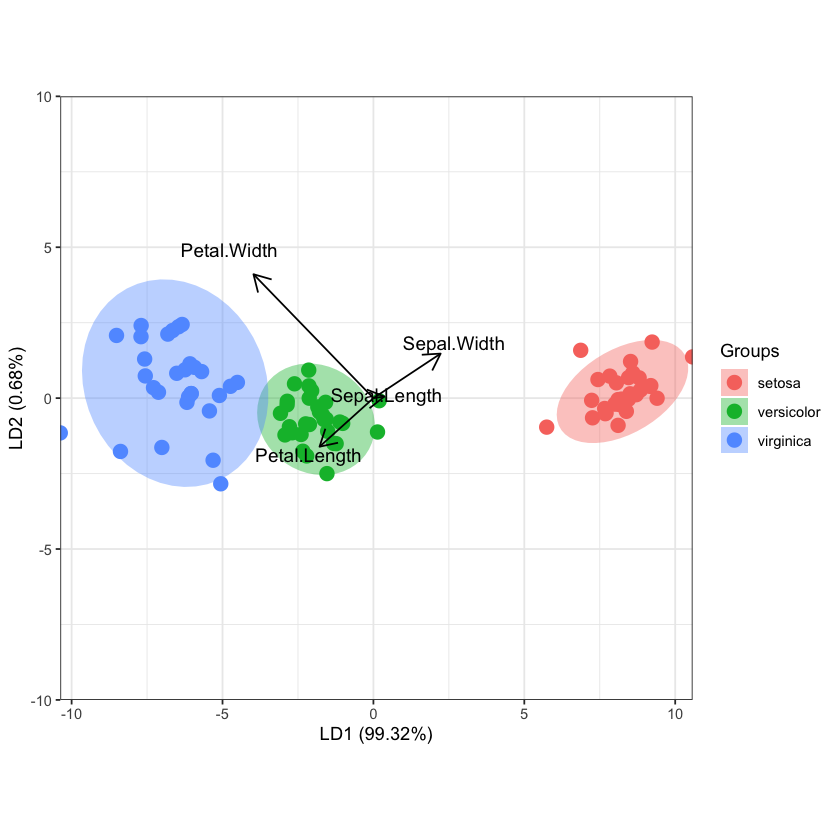

In [18]:
ggord(linear, training$Species, ylim = c(-10, 10))

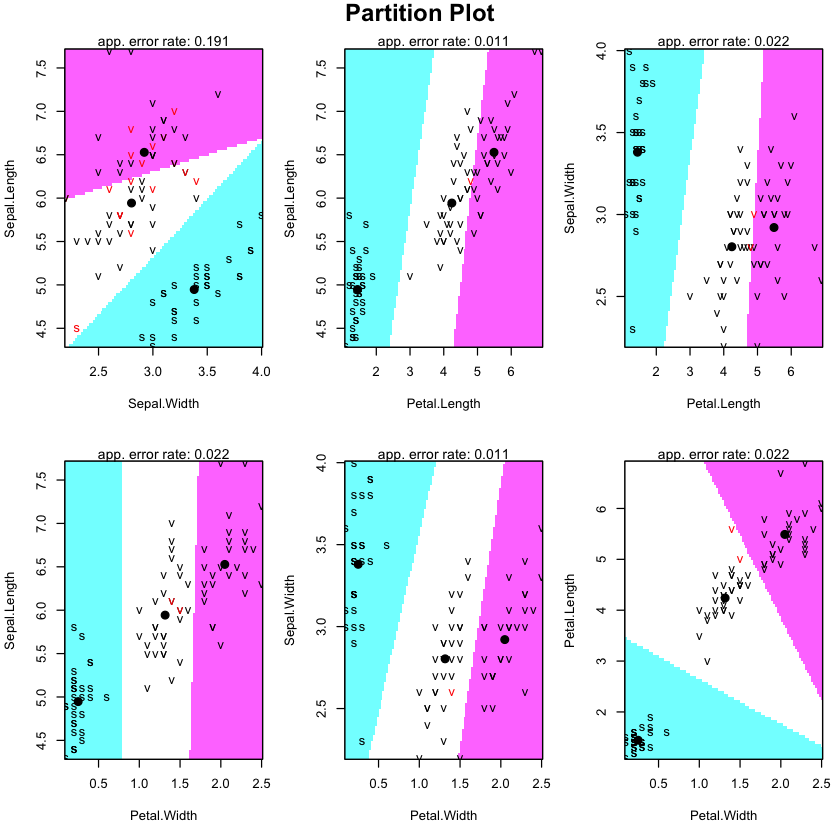

In [19]:
partimat(Species~., data = training, method = "lda")

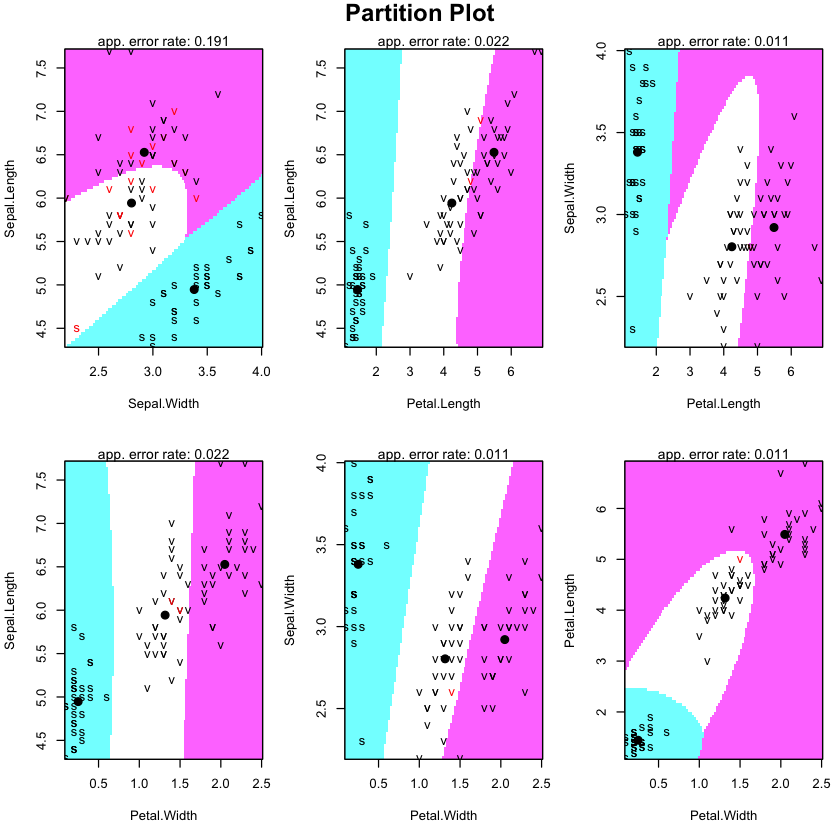

In [20]:
partimat(Species~., data = training, method = "qda")

In [21]:
p1 <- predict(linear, training)$class
tab <- table(Predicted = p1, Actual = training$Species)
tab

            Actual
Predicted    setosa versicolor virginica
  setosa         30          0         0
  versicolor      0         30         0
  virginica       0          0        29